In [15]:
import pandas as pd
df=pd.read_csv('IMDB Dataset.csv')
df=df[:10]

In [16]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [17]:
df['sentiment'].value_counts()

positive    7
negative    3
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

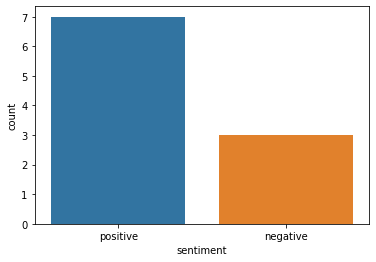

In [18]:
import seaborn as sns
sns.countplot(x='sentiment',data=df)

In [19]:
positive_review=list(df[df['sentiment']=='positive']['review'])
negative_review=list(df[df['sentiment']=='negative']['review'])

In [20]:
from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt 
stopwords=set(STOPWORDS)
# stopwords

In [21]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080, 
                      width=1920, 
                      background_color='white', 
                      min_font_size=10, 
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

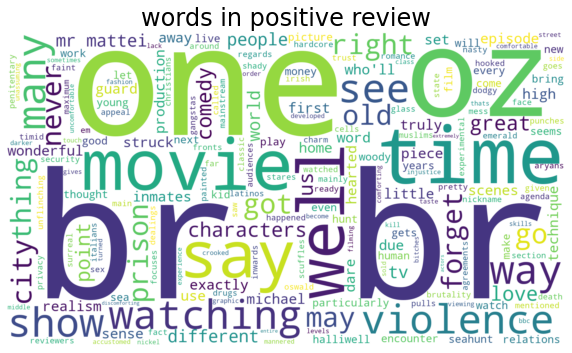

In [22]:
create_cloud(' '.join(positive_review).lower(),'words in positive review')

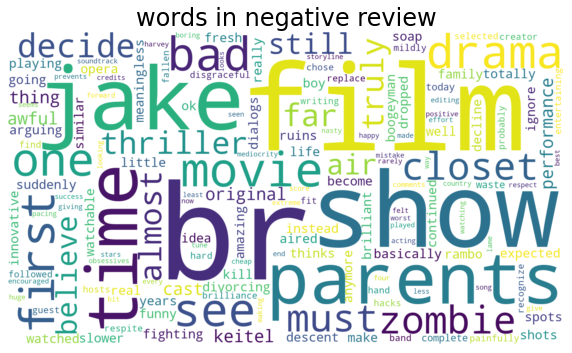

In [23]:
create_cloud(' '.join(negative_review).lower(),'words in negative review')

In [24]:
def text_processing(data):
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above stundents 
    from tqdm import tqdm
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data['review'].values):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords)
        preprocessed_reviews.append(sentance.strip())
    
    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list2=[]
    for  sentence in preprocessed_reviews:
      list1=[]
      for words in sentence.split():
        list1.append(porter.stem(words))

      list2.append(' '.join(list1))
    return(list2)

In [25]:
x=text_processing(df)

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 656.13it/s]


In [26]:
df['cleaned_review']=x

In [27]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hooked...
1,A wonderful little production. <br /><br />The...,positive,a wonder littl production. the film techniqu u...
2,I thought this was a wonderful way to spend ti...,positive,i thought wonder way spend time hot summer wee...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy (jake) think zombi clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [28]:
df_x=df['review']
df_y=df['sentiment']

In [29]:
df_x.shape

(10,)

In [30]:
df_y.shape

(10,)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_x)

In [32]:
X.shape

(10, 675)

In [39]:
X.toarray()[0]

array([ 0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        0,  0,  0,  1,  0,  0,  0,  0,  1,  6,  0,  0,  0,  0,  1,  2,  0,
        1,  0,  1,  4,  0,  1,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  2,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  6,  0,  0,
        0,  0,  0,  1,  0,  2,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,
        0,  1,  0,  0,  0,  0,  1,  2,  1,  1,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  1,
        1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  2,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        0,  0,  2,  0,  1,  0,  1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  1,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  1,
        0,  5,  3,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,  2,  0,
        0,  1,  0,  0,  1

In [67]:
# PCA - Principle component Analaysis

# (row,columns)

# 10,10**(1/2)

# Dimentionality cursity


# 1. High variance
# 2. Min Distance

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
data = pca.fit_transform(X.toarray())

In [68]:
pca.components_

array([[-0.01663053, -0.00972161,  0.00658219, ..., -0.01878142,
         0.01919107, -0.01308985],
       [ 0.00515542,  0.0007754 ,  0.00852819, ..., -0.00076277,
         0.03454745, -0.01126303],
       [-0.03354751, -0.00235902,  0.04463881, ...,  0.00675321,
        -0.0167244 , -0.01224259]])

In [69]:
X.shape

(10, 675)

In [73]:
# principal_breast_Df = pd.DataFrame(data = data
#              , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [74]:
# print(pca.explained_variance_ratio_)


In [75]:
# principal_breast_Df

In [77]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, df_y)
# print(neigh.predict([[1.1]]))

KNeighborsClassifier(n_neighbors=3)

In [78]:
neigh.predict(X)

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positive'],
      dtype=object)